# $k$-means
En este jupyter notebook vamos a aprender lo siguiente:

*   Conocer el ambiente Google Colab
*   Usar ***R*** en Google Colab
*   Realizar agrupamiento de datos usando $k$-means
*   Encontrar el mejor valor de $k$


El código fuente esta basado en el **Laboratorio 2 Clustering: 10.5.1. K-means Clustering, Capítulo 10** del libro *Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani - An Introduction to Statistical Learning with Applications in R-Springer (2014)*

## Conociendo el ambiente Google Colab

El ambiente Google Colab nos permite ejecutar codigo ***Python*** en nuestro navegador:
*   Sin ninguna configuración previa
*   Acceso gratuito a GPUs
*   Facil de compartir

Para mayor información, visistar lo siguientes links:
*   [¿Qué es Google Colab?](https://colab.research.google.com/notebooks/intro.ipynb)
*   [¿Como montar el Google Drive para ser usado en Google Colab?](https://colab.research.google.com/notebooks/io.ipynb)

Podemos comenzar a ejecutar algunas operaciones matemáticas en Google Colab.
```python
5+5
```
```python
5*5
```
```python
((5+5)*5+20)/15
```
Existen 3 métodos para ejecutar una celda:
* Apretar el boton de play al inicio de la celda.
* Presionar ***CTRL + ENTER***.
* Presionar ***SHIFT + ENTER***, lo cual agregará una celda al final.

In [ ]:
((5+5)*5+20)/15

4.666666666666667

## Usando ***R*** en Google Colab

Debido a que inicialmente Google Colab fue creado para programar en lenguaje ***Python***, es necesario configurar el ambiente para poder usar ***R***. Para mayor información, visitar el siguiente link: [Como usar R en Google Colab](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)

Solo será necesario ejecutar la siguiente celda al inicio de cada Google Colab:
```python
%load_ext rpy2.ipython
```
Y adicionar la siguiente linea al inicio de cada celda:
```python
%%R
```
De esa manera Google Colab sabrá que esa celda contiene codigo en lenguaje ***R***.

Ademas, de esta manera podemos ejecutar codigo en ***Python*** y ***R*** en el mismo Google Colab.

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Ejecutemos las siguientes lineas para conocer la versión de ***R*** con la que estamos trabajando:
```python
%%R
R.version
```

In [ ]:
%%R
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           


## Agrupamiento usando $k$-means

### Base de datos

Creamos una base de datos:
* Observaciones: $n=250$
* Atributos: $p=2$

Vamos a tener 5 grupos de observaciones.
Por lo tanto, el número óptimo de clusters es: $k=5$

In [ ]:
%%R
# Fijamos el seed para poder reproducir el experimento
set.seed(10)

# Matriz con 500 datos en 2 columnas [250 x 2]
x = matrix(rnorm(500), ncol=2)

# Aplicamos una traslación a algunos datos para crear grupos
# Grupo 1
x[1:50,1] = x[1:50,1] + 4
x[1:50,2] = x[1:50,2] - 3
# Grupo 2
x[50:100,1] = x[50:100,1] - 4
x[50:100,2] = x[50:100,2] + 3
# Grupo 3
x[100:150,1] = x[100:150,1] - 3
x[100:150,2] = x[100:150,2] - 4
# Grupo 4
x[150:200,1] = x[150:200,1] + 3
x[150:200,2] = x[150:200,2] + 4

### Visualizando la base de datos

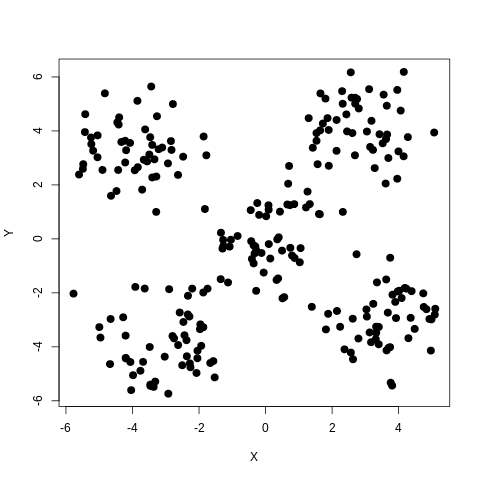

In [ ]:
%%R
plot(x, xlab ="X", ylab ="Y", pch =20, cex =2)

### Usando la funcion *kmeans* de ***R***

La función *kmeans* de ***R*** realiza agrupamiento usando $k$-means.

```
kmeans(x, 5, nstart=20)
```
* x: matriz con todas las observaciones y sus respectivos atributos [$n\times p$].
* $k$=5: número de clusters.
* *nstart=20*: número de inicializaciones. Al final el mejor resultado es reportado.

El resultado es una lista con la siguiente información:

* *cluster*: Vector indicando a cual cluster pertenece cada observación.
* *centers*: Una matriz con los centros de los clusters.
* *withinss*: Vector con la suma de cuadrados dentro de cada cluster.
* *tot.withinss*: La suma de la suma de cuadrados dentro de cada cluster (sum(withinss)).
* *size*: Número de observaciones en cada cluster.

Para mayor información sobre los parametros de entrada y salida, visitar la [documentación de la función](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/kmeans).

In [ ]:
%%R
km.out = kmeans(x, 5, nstart=20)
km.out

K-means clustering with 5 clusters of sizes 51, 49, 49, 51, 50

Cluster means:
         [,1]        [,2]
1  0.08653919 -0.01501027
2  2.79607529  4.13472399
3 -3.95545206  3.31308014
4 -3.01693335 -3.83422577
5  3.59340551 -2.96957398

Clustering vector:
  [1] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [38] 5 5 5 5 5 5 5 5 5 5 5 5 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[149] 4 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1]  96.76743  94.74796  90.91790 120.12135  91.36054
 (between_SS / total_SS =  90.7 %)

Available components:

[1] "cluster"      "centers"      "totss"      

### Visualizando los clusters

Ahora vamos a visualizar las observaciones y a que cluster pertenece cada una asignando un color diferente a cada cluster.

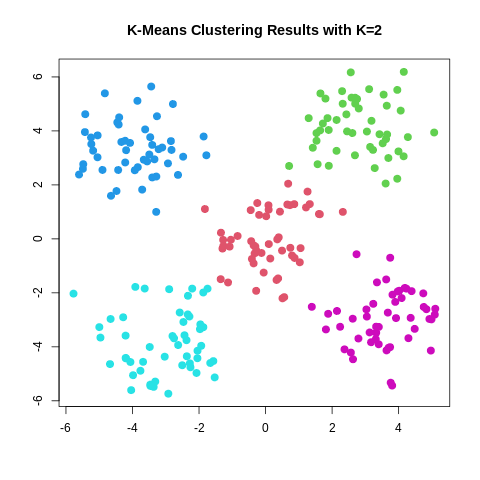

In [ ]:
%%R
plot(x, col =(km.out$cluster+1) , main ="K-Means Clustering Results with K=2", xlab ="", ylab ="", pch =20, cex =2)

## Encontrando el mejor valor de $k$

Para encontrar el mejor valor de $k$ vamos a usar el método del codo (*elbow*).

Primero vamos a necesitar instalar la libreria ***purrr*** para usar la función ***map_dbl***.

In [ ]:
%%R
install.packages("purrr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/purrr_0.3.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 375062 bytes (366 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

Método del codo (*elbow*)
1.   Definir una función que ejecute $k$-means y retorne la suma de cuadrados en cada cluster.
2.   Definir el rango de valores para $k$.
3.   Calcular la suma de cuadrados en cada cluster para cada valor de $k$.
4.   Graficar Valores de $k$ vs. Suma de Cuadrados.
5.   Analizar la grafica para encontrar el valor de $k$ óptimo.



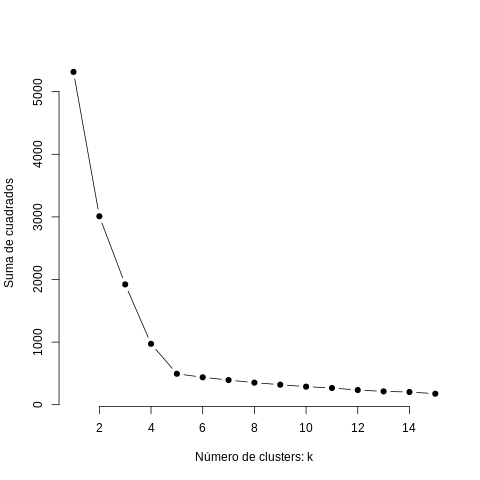

In [ ]:
%%R
library(purrr)
set.seed(2)

# Función para obtener la suma de cuadrados luego de ejecutar k-means
wss <- function(k) {
  kmeans(x, k, nstart = 20 )$tot.withinss
}

# Definiendo el rango de valores para k
k.values <- 1:15

# extrayendo la suma de cuadrados para todos los valores de k
wss_values <- map_dbl(k.values, wss)

# graficando la suma de cuadrados vs numero de clusters k
plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Número de clusters: k",
       ylab="Suma de cuadrados")